In [ ]:
#Access an open source dataset “Titanic”. Apply pre-processing techniques on the raw dataset. 

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv("train.csv")
#reading the data From the dataset,before this always upload the dataset in the folder then use this command


In [3]:
#list all columns present in the datasets
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#since the number of columns and rows are more ,we will display only 5(by defualt),you can list more simply by changing the parameter like "train_df.head(10)"
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#seeing the data from the tail side 
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#shows which column has null values ,and totals the number of null values according to columns
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#another way to do the same
column_names = train_df.columns
for column in column_names:
    print(column + ' - ' + str(train_df[column].isnull().sum()))
    

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [8]:
print(train_df.shape)
#since the data is in rows and column formate we get to know about number of rows and number of columns

(891, 12)


In [9]:
print(train_df.dtypes)
#what are the different data types 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
#here we drop the columns which we of no use for further analysis
train_df= train_df.drop(['PassengerId'], axis=1)
train_df = train_df.drop(['Name'], axis=1)

train_df= train_df.drop(['Cabin','Ticket'], axis=1)

train_df = train_df.drop(['Fare'], axis=1)

In [20]:
#Then we check is a column which is needed in future has a null value ,like age
print(train_df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64


In [11]:
#we have remove the null value with "unknown" hence our data is ready for future analysis
median_age = train_df['Age'].median()
train_df['Age'] = train_df['Age'].fillna(median_age)

In [12]:
print(train_df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64


In [13]:
#lets do analysis of how many passenger where able to survive
train_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

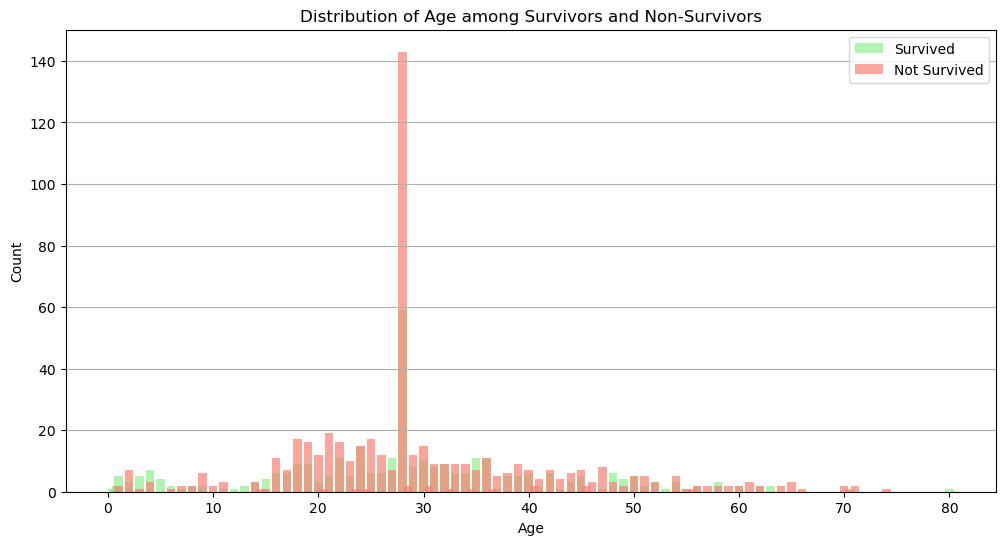

In [18]:
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

# Count the occurrences of each age for survivors and non-survivors
survived_age_counts = survived['Age'].value_counts().sort_index()
not_survived_age_counts = not_survived['Age'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Plot for survivors
plt.bar(survived_age_counts.index, survived_age_counts.values, color='lightgreen', label='Survived', alpha=0.7)

# Plot for non-survivors
plt.bar(not_survived_age_counts.index, not_survived_age_counts.values, color='salmon', label='Not Survived', alpha=0.7)

plt.title('Distribution of Age among Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y')
plt.show()